In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
df = pd.read_csv('./two_way_anova.csv')
df.head()

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170


In [5]:
test = ols('Sales ~ C(Flavour) * C(Location)', data=df).fit()
anova_table = sm.stats.anova_lm(test, typ = 2)
print(anova_table)

                               sum_sq    df         F    PR(>F)
C(Flavour)                6919.558981   2.0  1.968465  0.145773
C(Location)               2059.273884   3.0  0.390546  0.760092
C(Flavour):C(Location)   11802.257765   6.0  1.119163  0.357804
Residual                154669.016331  88.0       NaN       NaN


sum_sq: variation in the dependent variables

df: degrees of freedom

F: F-stat

PR: probabilities associated with F-stats

alpha = 0.05 (Reject H0 if p<0.05)

1. PR - Flavour: 0.145. This is not too small --> Fail to reject
2. PR - location: 0.76. --> Fail to reject
3. PR - interaction: 0.35 --> fail to reject

## Ks Test

In [6]:
# Recovery times from 2 drugs
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [7]:
r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

In [8]:
r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]


In [9]:
d1 = np.array(r1)
d2 = np.array(r2)
n1 = len(d1)
n2 = len(d2)
n1, n2

(100, 120)

In [10]:
np.mean(d1)

7.1049166262

In [11]:
np.mean(d2)

8.073423327583333

In [12]:
statistic, p_value =  stats.kstest(d1, d2)
print("KS Statistic:", statistic)
print("P-value:", p_value)

KS Statistic: 0.3233333333333333
P-value: 1.516338798228849e-05


In [13]:
if p_value > 0.01:
    print("The p-value is greater than 0.01,two samples have the same distribution.")
else:
    print("The p-value is less than or equal to 0.01, two samples have different distributions.")

The p-value is less than or equal to 0.01, two samples have different distributions.


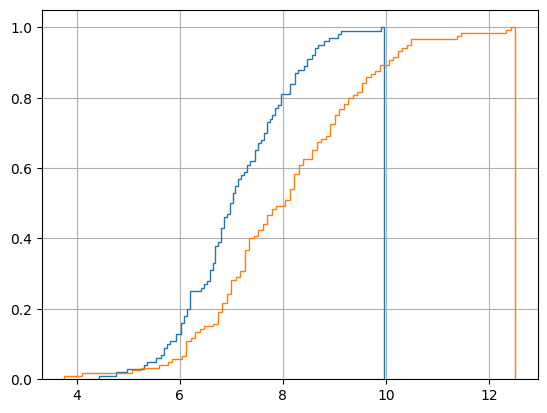

In [14]:
plt.grid()
a = plt.hist(d1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(d2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

# A-B Test

In [15]:
# Youtube case study
import seaborn as sns
from scipy import stats


In [16]:
ab_test_data = pd.read_csv("ab_test_data.csv")
ab_test_data.head(10)

,date,customer_id,premium,watch_time_hrs,customer_segmnt
0,2018-09-11,402,0,7.173618,control
1,2018-02-28,227,0,0.836170,control
2,2018-10-18,812,1,4.402078,treatment
3,2018-05-22,43,0,3.982454,control
4,2018-07-18,307,0,7.513302,control
5,2018-09-10,238,0,1.456961,control
6,2018-02-21,691,1,3.800375,treatment
7,2018-04-27,199,0,4.574446,control
8,2018-05-28,105,0,3.425942,control
9,2018-09-24,604,0,3.959896,treatment


In [22]:
len(ab_test_data)

19960

In [17]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "control"))

8459

In [18]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "control"))


1514

In [20]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "treatment"))


7975

In [21]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "treatment"))


2012

In [24]:
ab_test_data.shape

(19960, 5)

In [28]:
ab_test_data["customer_segmnt"].value_counts()
# Balance Data 

customer_segmnt
treatment    9987
control      9973
Name: count, dtype: int64

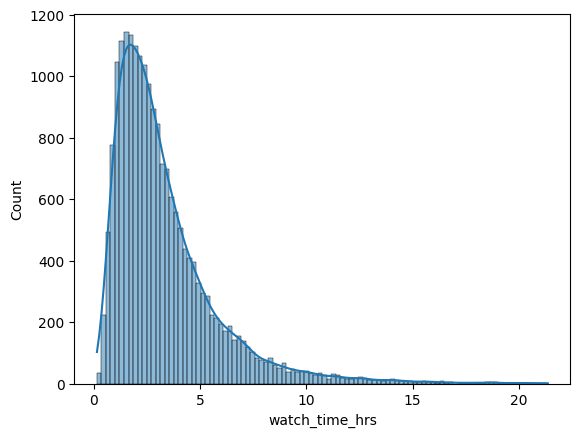

In [30]:
# histogram of the data
sns.histplot(ab_test_data["watch_time_hrs"], bins=100, kde=True)
plt.show()

In [31]:
ab_test_data.groupby("customer_segmnt")["watch_time_hrs"].mean()

customer_segmnt
control      3.609960
treatment    3.054294
Name: watch_time_hrs, dtype: float64

In [32]:
ab_test_control_data = ab_test_data[ab_test_data["customer_segmnt"] == "control"]
ab_test_treatment_data = ab_test_data[ab_test_data["customer_segmnt"] == "treatment"]

In [33]:
ab_test_control_data.shape[0]

9973

In [34]:
ab_test_treatment_data.shape[0]

9987

In [35]:
statistic, p_value = stats.ttest_ind(ab_test_control_data["watch_time_hrs"], ab_test_treatment_data["watch_time_hrs"])
print("T-Statistic:", statistic)
print("P-value:", p_value)

T-Statistic: 15.96034913022092
P-value: 5.438408586231319e-57
